# Predicción de crímenes
### Trabajo Fin de Máster para el Máster Universitario en Ciencia de Datos
### Universitat Oberta de Catalunya
### Realizado por Álvaro Pavón Díaz

## Parte 1: Comprensión y preparaciónde los datos
Durante este Jupyter notebook nos dedicaremos a realizar diferentes pruebas de visualización de los datos para su comprensión y transformación de diferentes atributos para su posterior utilización en la predicción de donde se producirán los siguientes crímenes.

Para ello lo primero se va a proceder a importar las diferentes clases que se necesitarán a lo largo de este notebook y la importación del archivo que se va a utilizar, que se puede acceder a través del siguiente link: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time_function
from sklearn.preprocessing import MinMaxScaler

In [2]:
crimes_df = pd.read_csv ('crime.csv', sep='""', delimiter=',', engine='python')
original_crimes_df = crimes_df

Comenzamos mirando que los datos han sido cargados correctamente.

In [3]:
crimes_df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [4]:
crimes_df.tail(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
327810,I080542626-00,3125,Warrant Arrests,WARRANT ARREST,A1,111,NaN,2015-08-12 12:00:00,2015,8,Wednesday,12,Part Three,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
327811,I080542626-00,1848,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,A1,111,NaN,2015-08-12 12:00:00,2015,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
327812,I080542626-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",A1,111,NaN,2015-08-12 12:00:00,2015,8,Wednesday,12,Part Two,BOYLSTON ST,42.352312,-71.063705,"(42.35231190, -71.06370510)"
327813,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
327814,I060168073-00,3125,Warrant Arrests,WARRANT ARREST,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Three,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
327815,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
327816,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
327817,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
327818,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
327819,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


Lo primero que vamos a ver es las dimensiones y tipos que tienen los diferentes atributos del conjunto de datos.

Además veremos un resumen de los datos que tenemos en el momento de cargar los datos.

In [5]:
print('Las dimensines del archivo son: ' )
print (crimes_df.shape)
print('Los tipos son los siguientes: ')
print(crimes_df.dtypes)

Las dimensines del archivo son: 
(327820, 17)
Los tipos son los siguientes: 
INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object


Vamos a ver lo primero si hay elementos duplicados y eliminaremos estos como primera modificación del conjunto original descargado.

In [6]:
print("¿Hay duplicados?")
print (not (crimes_df.drop_duplicates().shape[0] == crimes_df.shape[0]))
crimes_df = crimes_df.drop_duplicates()
print("Número de elementos tras eliminar los duplicados: "+ str (crimes_df.shape[0]))

¿Hay duplicados?
True
Número de elementos tras eliminar los duplicados: 327797


In [7]:
crimes_df.describe(include='all')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,327797,327797.000000,327797,327797,326023,327797,1055,327797,327797.000000,327797.000000,327797,327797.000000,327704,316820,307166.000000,307166.000000,327797
unique,290156,NaN,67,244,12,880,1,239364,NaN,NaN,7,NaN,4,4684,NaN,NaN,18255
top,I162030584,NaN,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2016-08-01 00:00:00,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
freq,13,NaN,38134,19360,51283,20920,1055,29,NaN,NaN,49752,NaN,162912,14588,NaN,NaN,20631
mean,NaN,2317.932001,NaN,NaN,NaN,NaN,NaN,NaN,2016.598764,6.672123,NaN,13.114812,NaN,NaN,42.212987,-70.906018,NaN
std,NaN,1185.012823,NaN,NaN,NaN,NaN,NaN,NaN,1.009742,3.253971,NaN,6.292765,NaN,NaN,2.173574,3.515958,NaN
min,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-71.178674,NaN
25%,NaN,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,4.000000,NaN,9.000000,NaN,NaN,42.297466,-71.097081,NaN
50%,NaN,2907.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,7.000000,NaN,14.000000,NaN,NaN,42.325552,-71.077493,NaN
75%,NaN,3201.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,9.000000,NaN,18.000000,NaN,NaN,42.348624,-71.062482,NaN


Veremos que elementos tienen elementos nulos, como podemos ver nos faltan por determinar algunos district, UCT_PART y street. 

Aunque parezca que faltan datos de shooting por la información de donde se han obtenido los datos podemos ver que los nulos es que no se han producido disparos.

In [8]:
print('¿Hay elementos nulls?')
crimes_df.isnull().sum()

¿Hay elementos nulls?


INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
REPORTING_AREA              0
SHOOTING               326742
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   93
STREET                  10977
Lat                     20631
Long                    20631
Location                    0
dtype: int64

Analicemos con detalle que ocurre en los casos que no tenemos ni latitud ni longitud

In [9]:
print("¿Todos los que no tienen Longitud, no tienen la latitud?")
print(crimes_df[crimes_df["Lat"].isnull()].isnull().sum()['Lat'] 
      == crimes_df[crimes_df["Long"].isnull()].isnull().sum()['Long']
      and crimes_df.isnull().sum()['Lat'] 
      == crimes_df[crimes_df["Long"].isnull()].isnull().sum()['Long'])
print ("¿Cómo son los elementos con latitus y longitud que tienen nulos?")
print(crimes_df[crimes_df["Lat"].isnull()].head(5))
print("De los que tienen latitud y longitud nula, ¿hay alguno que tengamos la información en la location?")
print(crimes_df[crimes_df["Lat"].isnull()][crimes_df["Location"] != "(0.00000000, 0.00000000)"])
print("De los que tienen latitud y longitud nula, ¿cuántos no tienen DISTRICT?")
print(crimes_df[crimes_df["Lat"].isnull()].isnull().sum()['DISTRICT'])

¿Todos los que no tienen Longitud, no tienen la latitud?
True
¿Cómo son los elementos con latitus y longitud que tienen nulos?
    INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
150      I182079891           413  Aggravated Assault   
151      I182079891          3125     Warrant Arrests   
216      I182079820          1402           Vandalism   
220      I182079816          1402           Vandalism   
248      I182079784           802      Simple Assault   

                OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
150  ASSAULT - AGGRAVATED - BATTERY       C6                     NaN   
151                  WARRANT ARREST       C6                     NaN   
216                       VANDALISM      C11                     NaN   
220                       VANDALISM      C11                     NaN   
248        ASSAULT SIMPLE - BATTERY      C11            355      NaN   

        OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
150  2018-10-03 12:53:00  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Estos elementos que no tenemos información del distrito ni de la localización vamos a eliminarlos del conjunto de datos.

In [10]:
crimes_df.dropna(subset=['Lat', 'DISTRICT'], how='all', inplace=True)
print("Número de elementos tras eliminarlos: "+ str (crimes_df.shape[0]))

Número de elementos tras eliminarlos: 327503


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Queda por decidir que hacer con los elementos que no tenemos el distrito, pero tenemos las coordenadas. Debido al bajo porcentaje de estos casos (inferior al 1%) se decide por eliminar estos casos.

In [11]:
print('Porcentaje de elementos sin distrito: ' +str(crimes_df.isnull().sum()['DISTRICT']*100/crimes_df.shape[0]))
crimes_df.dropna(subset=['DISTRICT'], how='all', inplace=True)
print("Número de elementos tras eliminarlos: "+ str (crimes_df.shape[0]))

Porcentaje de elementos sin distrito: 0.4519042573655814
Número de elementos tras eliminarlos: 326023


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Veamos si hay mas anomalías en las coordenadas que quedan.

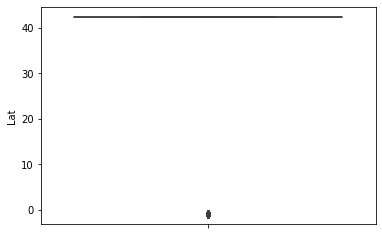

In [12]:
sns.boxplot(y= crimes_df['Lat'])

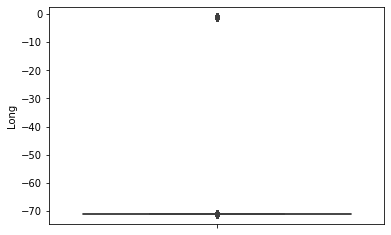

In [13]:
sns.boxplot(y= crimes_df['Long'])

Vemos que existen outliers y estos deberíamos ver de cuantos son. Como son pocos se procederá a eliminarlos.

In [14]:
print ('El número de outliers es ' + str(crimes_df.query('Lat <= 20 and Long >-60').shape[0]))

crimes_df = crimes_df.query('Lat >= 20 and Long <-60')

El número de outliers es 166


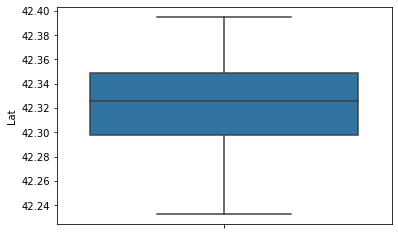

In [15]:
sns.boxplot(y= crimes_df['Lat'])

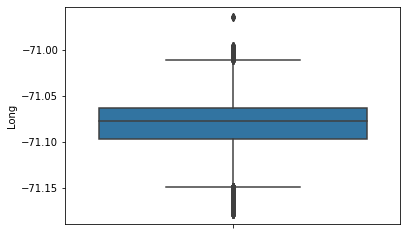

In [16]:
sns.boxplot(y= crimes_df['Long'])

In [17]:
district = crimes_df.DISTRICT.unique()

colors_dict=dict(zip(district, sns.color_palette(palette="muted",n_colors=12)))

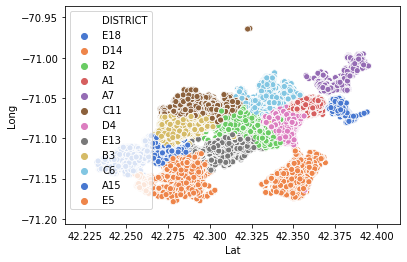

In [18]:
district = crimes_df.DISTRICT.unique()

colors_district=dict(zip(district, sns.color_palette(palette="muted",n_colors=12)))

sns.scatterplot(x='Lat', y = 'Long',hue = 'DISTRICT', data=crimes_df, palette=colors_district)

In [19]:
print(crimes_df.UCR_PART.value_counts().head(10))
crimes_df.dropna(subset= ['UCR_PART'], inplace=True)
crimes_df = crimes_df.query('UCR_PART != "Other"')
print (crimes_df.UCR_PART.value_counts().head(10))
crimes_df.isnull().sum()

Part Three    150579
Part Two       93319
Part One       60331
Other           1198
Name: UCR_PART, dtype: int64
Part Three    150579
Part Two       93319
Part One       60331
Name: UCR_PART, dtype: int64


INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                    0
REPORTING_AREA              0
SHOOTING               303217
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                    0
STREET                    943
Lat                         0
Long                        0
Location                    0
dtype: int64

Contaremos los diferentes elementos que hay según diferentes campos.

In [20]:
print (crimes_df.OFFENSE_CODE.value_counts().head(10))

3006    18429
3115    18394
1402    14984
3831    14806
802     14293
3301    13321
3410    11072
3114    10895
617      9116
2647     9088
Name: OFFENSE_CODE, dtype: int64


In [21]:
print (crimes_df.OFFENSE_CODE_GROUP.value_counts().head(10))

Motor Vehicle Accident Response    31444
Larceny                            25819
Medical Assistance                 23089
Investigate Person                 18394
Other                              17512
Simple Assault                     15307
Vandalism                          15240
Drug Violation                     14927
Verbal Disputes                    13321
Towed                              11072
Name: OFFENSE_CODE_GROUP, dtype: int64


In [22]:
print (crimes_df.YEAR.value_counts().head(10))

2017    93091
2016    91429
2018    68668
2015    51041
Name: YEAR, dtype: int64


In [23]:
print (crimes_df.DISTRICT.value_counts().head(100))

B2     47233
C11    41915
D4     39566
B3     34427
A1     32853
C6     22393
D14    19543
E18    17026
E13    16956
E5     13038
A7     13008
A15     6271
Name: DISTRICT, dtype: int64


In [24]:
print (crimes_df.drop_duplicates().INCIDENT_NUMBER.value_counts().head(10))

I162030584    12
I152080623    11
I172013170    10
I182065208    10
I172096394    10
I172022524     9
I162098170     9
I162001871     9
I162071327     9
I172056883     8
Name: INCIDENT_NUMBER, dtype: int64


A la hora de programar el modelo el nombre de la incidencia no es relevante para decidir donde se producirá el siguiente crimen. Por tanto es conveniente eliminar este campo del conjunto de datos.

In [25]:
crimes_df.drop('INCIDENT_NUMBER', 1, inplace= True)

Ahora vamos a realizar unas serie de visualizaciones de los datos que tenemos hasta ahora.

Text(0.5, 1.0, 'El número de crímenes por distritos')

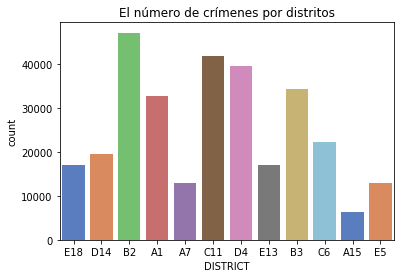

In [26]:
sns.countplot (x= 'DISTRICT',data=crimes_df, palette=colors_district).set_title("El número de crímenes por distritos")

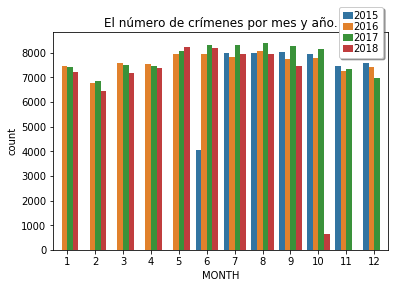

In [27]:
s = sns.countplot(x='MONTH', hue='YEAR', data=crimes_df, ).set_title("El número de crímenes por mes y año.")

plt.legend(ncol=1, loc='center right', 
           bbox_to_anchor=[1, 1], 
           columnspacing=1.4, labelspacing=0.1,
           handletextpad=0.1, handlelength=1,
           fancybox=True, shadow=True)

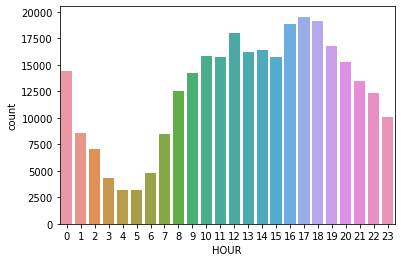

In [28]:
sns.countplot(x='HOUR', data=crimes_df)

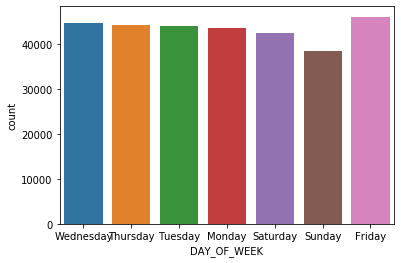

In [29]:
sns.countplot(x='DAY_OF_WEEK', data=crimes_df)

Ahora nos centraremos en al variable que forma parte de si se han producido disparos, en este caso haremos una binarización de esta en 0 si no ha habido disparo y 1 en caso contrario.

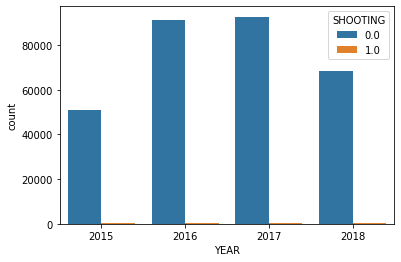

In [30]:
crimes_df['SHOOTING']=crimes_df['SHOOTING'].map({'Y':1})
crimes_df['SHOOTING'].fillna(0, inplace=True)
sns.countplot(x='YEAR', hue='SHOOTING', data=crimes_df)

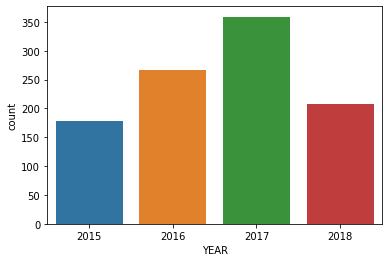

In [31]:
sns.countplot(x='YEAR',  data=crimes_df.loc[crimes_df['SHOOTING'] == 1])

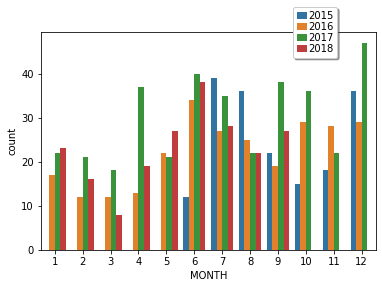

In [32]:
s = sns.countplot(x='MONTH', hue='YEAR', data=crimes_df.loc[crimes_df['SHOOTING'] == 1])
plt.legend(ncol=1, loc='center right', 
           bbox_to_anchor=[0.9, 1], 
           columnspacing=1.4, labelspacing=0.1,
           handletextpad=0.1, handlelength=1,
           fancybox=True, shadow=True)

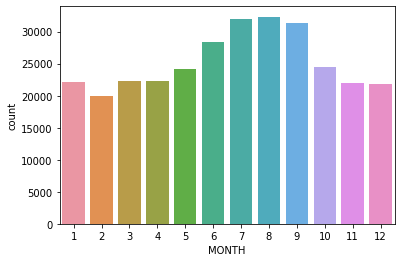

In [33]:
sns.countplot(x='MONTH',  data=crimes_df.loc[crimes_df['SHOOTING'] == 0])

Text(0.5, 1.0, 'Crímenes con disparos por distritos')

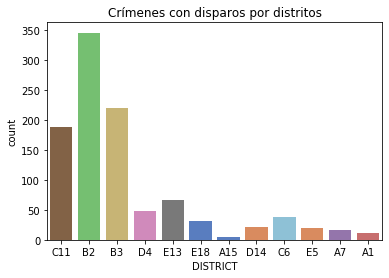

In [34]:
sns.countplot(x='DISTRICT', data=crimes_df.loc[crimes_df['SHOOTING'] == 1], palette=colors_district).set_title('Crímenes con disparos por distritos')

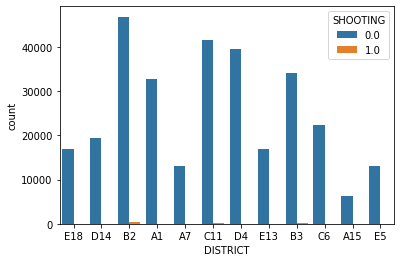

In [35]:
sns.countplot(x='DISTRICT', hue='SHOOTING', data=crimes_df)

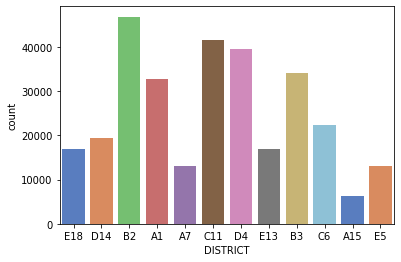

In [36]:
sns.countplot(x='DISTRICT', data=crimes_df.loc[crimes_df['SHOOTING'] == 0], palette=colors_district)

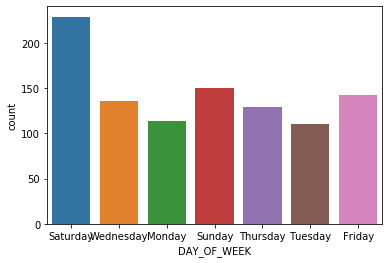

In [37]:
sns.countplot(x='DAY_OF_WEEK', data=crimes_df.loc[crimes_df['SHOOTING'] == 1])

Vamos a crear una nueva variable binaria que nos indique según el mes y la hora del día es de día o de noche.

In [38]:
crimes_df['IS_NIGHT'] = np.vectorize(time_function.is_night)(crimes_df['MONTH'], crimes_df['HOUR'])

In [39]:
crimes_df.tail(5)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,IS_NIGHT
327815,3125,Warrant Arrests,WARRANT ARREST,D4,285,0.0,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",0
327816,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,0.0,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",0
327817,3125,Warrant Arrests,WARRANT ARREST,E18,520,0.0,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",0
327818,3125,Warrant Arrests,WARRANT ARREST,E13,569,0.0,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",0
327819,3125,Warrant Arrests,WARRANT ARREST,D4,903,0.0,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)",1


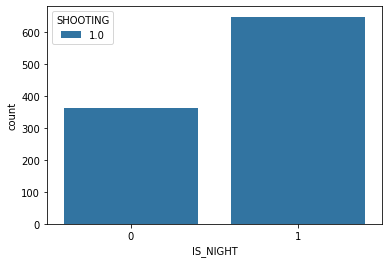

In [40]:
sns.countplot(x='IS_NIGHT', hue='SHOOTING', data=crimes_df.loc[crimes_df['SHOOTING'] == 1])

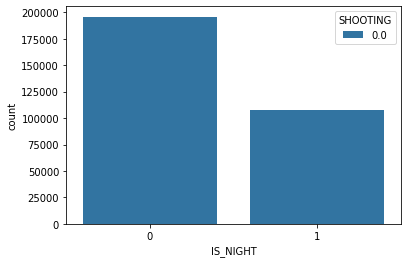

In [41]:
sns.countplot(x='IS_NIGHT', hue='SHOOTING', data=crimes_df.loc[crimes_df['SHOOTING'] == 0])

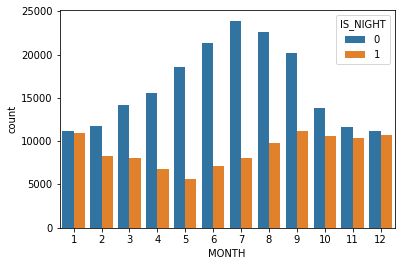

In [42]:
sns.countplot(x='MONTH', hue='IS_NIGHT', data=crimes_df.loc[crimes_df['SHOOTING'] == 0])

Vamos a hacer drop de la columnas que no vamos a usar en el entrenamiento del modelo de datos: OFFENSE_DESCRIPTION, REPORTING_AREA, OCCURRED_ON_DATE, STREET, Lat, Long y Location. Pero antes vamos a sacar del OCCURRED_ON_DATE el día del mes.

In [43]:
crimes_df['DAY_OF_MONTH'] = crimes_df.OCCURRED_ON_DATE.apply(lambda x: int(''.join(x[8:10])))

In [44]:
crimes_df.drop('OFFENSE_DESCRIPTION', 1, inplace= True)
crimes_df.drop('OCCURRED_ON_DATE', 1, inplace= True)
#crimes_df.drop('STREET', 1, inplace= True)
crimes_df.drop('REPORTING_AREA', 1, inplace= True)
#crimes_df.drop('Lat', 1, inplace= True)
#crimes_df.drop('Long', 1, inplace= True)
crimes_df.drop('Location', 1, inplace= True)
crimes_df.drop('OFFENSE_CODE', 1, inplace= True)

In [45]:
crimes_df.head(5)

,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,IS_NIGHT,DAY_OF_MONTH
0,Disorderly Conduct,E18,0.0,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,1,3
1,Property Lost,D14,0.0,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,1,30
2,Other,B2,0.0,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,1,3
3,Aggravated Assault,A1,0.0,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,1,3
4,Aircraft,A7,0.0,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,1,3


In [46]:
crimes_df.to_csv('crimes_clean.csv', header = True, index=False)

Ahora vamos a generar un segundo conjunto de datos haciendo que el tiempo definido por mes, día y hora reducirlo a dos componentes generando así un ciclo, usando el año para poder determinar si es bisiesto o no.

In [47]:
crimes_df['TIME_X'] = np.vectorize(time_function.time_x)(crimes_df['YEAR'],crimes_df['MONTH'],crimes_df['DAY_OF_MONTH'] ,crimes_df['HOUR'])
crimes_df['TIME_Y'] = np.vectorize(time_function.time_y)(crimes_df['YEAR'],crimes_df['MONTH'],crimes_df['DAY_OF_MONTH'] ,crimes_df['HOUR'])

In [48]:
crimes_df.head(5)

,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,IS_NIGHT,DAY_OF_MONTH,TIME_X,TIME_Y
0,Disorderly Conduct,E18,0.0,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,1,3,0.518198,0.000331
1,Property Lost,D14,0.0,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,1,30,0.239106,0.073462
2,Other,B2,0.0,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,1,3,0.517840,0.000318
3,Aggravated Assault,A1,0.0,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,1,3,0.518198,0.000331
4,Aircraft,A7,0.0,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,1,3,0.518198,0.000331


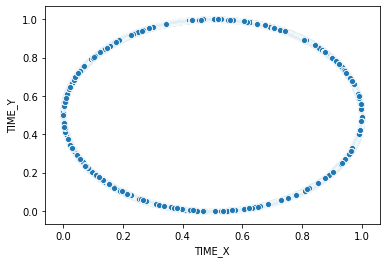

In [49]:
sns.scatterplot(x='TIME_X', y='TIME_Y', data=crimes_df)

Por último, vamos a estadarizar la latitud y la longitud.

In [50]:
crimes_df['Lat_M']=(crimes_df['Lat']-crimes_df['Lat'].min())/(crimes_df['Lat'].max()-crimes_df['Lat'].min())
crimes_df['Long_M']=(crimes_df['Long']-crimes_df['Long'].min())/(crimes_df['Long'].max()-crimes_df['Long'].min())

In [51]:
crimes_df.describe(include='all')

,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,IS_NIGHT,DAY_OF_MONTH,TIME_X,TIME_Y,Lat_M,Long_M
count,304229,304229,304229.000000,304229.000000,304229.000000,304229,304229.000000,304229,303286,304229.000000,304229.000000,304229.000000,304229.000000,3.042290e+05,3.042290e+05,304229.000000,304229.000000
unique,59,12,NaN,NaN,NaN,7,NaN,3,3837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Motor Vehicle Accident Response,B2,NaN,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,31444,47233,NaN,NaN,NaN,46161,NaN,150579,14202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.003326,2016.589641,6.673325,NaN,13.126125,NaN,NaN,42.322303,-71.082846,0.355311,15.733004,4.545955e-01,4.702116e-01,0.552731,0.445714
std,NaN,NaN,0.057579,1.014364,3.259134,NaN,6.277617,NaN,NaN,0.031872,0.029771,0.478608,8.835590,3.520491e-01,3.508751e-01,0.195983,0.138472
min,NaN,NaN,0.000000,2015.000000,1.000000,NaN,0.000000,NaN,NaN,42.232413,-71.178674,0.000000,1.000000,3.198556e-08,7.996391e-09,0.000000,0.000000
25%,NaN,NaN,0.000000,2016.000000,4.000000,NaN,9.000000,NaN,NaN,42.297555,-71.097189,0.000000,8.000000,1.077541e-01,1.218691e-01,0.400558,0.379002
50%,NaN,NaN,0.000000,2017.000000,7.000000,NaN,14.000000,NaN,NaN,42.325636,-71.077549,0.000000,16.000000,4.103712e-01,4.425391e-01,0.573227,0.470353
75%,NaN,NaN,0.000000,2017.000000,9.000000,NaN,18.000000,NaN,NaN,42.348624,-71.062563,1.000000,23.000000,8.024862e-01,8.170195e-01,0.714578,0.540057


In [52]:
crimes_df.to_csv('crimes_clean_time.csv', header = True, index=False)

In [53]:
dict_offense_code = {"Aggravated Assault": "Desorden", "Aircraft": "Otros", "Arson": "Desorden", "Assembly or Gathering Violations": "Desorden", "Auto Theft": "Robo", "Auto Theft Recovery": "Robo", "Ballistics": "Armas", "Biological Threat": "Otros", "Bomb Hoax": "Armas", "Burglary - No Property Taken": "Robo", "Commercial Burglary": "Robo", "Confidence Games": "Hurto", "Counterfeiting": "Falsificacion", "Criminal Harassment": "Falsificacion", "Disorderly Conduct": "Desorden", "Drug Violation": "Drogas", "Embezzlement": "Hurto", "Evading Fare": "Hurto", "Explosives": "Armas", "Fire Related Reports": "Otros", "Firearm Discovery": "Armas", "Firearm Violations": "Armas", "Fraud": "Fraude", "Gambling": "Fraude", "Harassment": "Sexual", "Harbor Related Incidents": "Sexual", "HOME INVASION": "Robo", "Homicide": "Asesinato", "HUMAN TRAFFICKING": "Sexual", "HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE": "Violento", "Investigate Person": "Investigar","INVESTIGATE PERSON": "Investigar","Investigate Property": "Investigar", "Landlord/Tenant Disputes": "Otros", "Larceny": "Hurto", "Larceny From Motor Vehicle": "Robo", "License Plate Related Incidents": "Trafico", "License Violation": "Desorden", "Liquor Violation": "Drogas", "Manslaughter": "Asesinato", "Medical Assistance": "Medica", "Missing Person Located": "Desaparecido", "Missing Person Reported": "Desaparecido", "Motor Vehicle Accident Response": "Trafico", "Offenses Against Child / Family": "Infancia", "Operating Under the Influence": "Drogas", "Other": "Otros", "Other Burglary": "Robo", "Phone Call Complaints": "Otros", "Police Service Incidents": "Otros", "Prisoner Related Incidents": "Violento", "Property Found": "Otros", "Property Lost": "Otros", "Property Related Damage": "Desorden", "Prostitution": "Sexual", "Recovered Stolen Property": "Robo", "Residential Burglary": "Robo", "Restraining Order Violations": "Otros", "Robbery": "Robo", "Search Warrants": "Otros", "Service": "Otros", "Simple Assault": "Violento", "Towed": "Trafico", "Vandalism": "Desorden", "Verbal Disputes": "Desorden", "Violations": "Desorden", "Warrant Arrests": "Desorden"}

In [54]:
crimes_df["OFFENSE_CODE_GROUP"] =  crimes_df["OFFENSE_CODE_GROUP"].map(dict_offense_code)
crimes_df.to_csv('crimes_clean_time_2.csv', header = True, index=False)

In [55]:
crimes_df['TIME_X'] = np.vectorize(time_function.time_day_x)(crimes_df['HOUR'])
crimes_df['TIME_Y'] = np.vectorize(time_function.time_day_x)(crimes_df['HOUR'])

crimes_df.to_csv('crimes_clean_time_3.csv', header = True, index=False)